In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
zoo=pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.shape

(101, 18)

In [5]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
zoo=zoo.drop(['animal name'],axis=1)

In [9]:
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# model building

In [10]:
x=zoo.drop(['type'],axis=1)
y=zoo['type']


In [11]:
x.shape,y.shape

((101, 16), (101,))

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [14]:
x_train.shape,y_train.shape

((80, 16), (80,))

In [15]:
x_test.shape,y_test.shape

((21, 16), (21,))

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier()
kkk=knn.fit(x_train,y_train)
kkk

KNeighborsClassifier()

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [19]:
for i in range(1,25):
    knn=KNeighborsClassifier(i)
    kk=knn.fit(x_train,y_train)
    yp=kk.predict(x_test)
    print("the",i,"accuracy rate:",accuracy_score(y_test,yp))

the 1 accuracy rate: 1.0
the 2 accuracy rate: 0.9047619047619048
the 3 accuracy rate: 0.9523809523809523
the 4 accuracy rate: 0.8571428571428571
the 5 accuracy rate: 0.8571428571428571
the 6 accuracy rate: 0.8571428571428571
the 7 accuracy rate: 0.8571428571428571
the 8 accuracy rate: 0.8571428571428571
the 9 accuracy rate: 0.8571428571428571
the 10 accuracy rate: 0.8571428571428571
the 11 accuracy rate: 0.8571428571428571
the 12 accuracy rate: 0.8571428571428571
the 13 accuracy rate: 0.8571428571428571
the 14 accuracy rate: 0.8571428571428571
the 15 accuracy rate: 0.8571428571428571
the 16 accuracy rate: 0.8571428571428571
the 17 accuracy rate: 0.8571428571428571
the 18 accuracy rate: 0.8571428571428571
the 19 accuracy rate: 0.8095238095238095
the 20 accuracy rate: 0.8095238095238095
the 21 accuracy rate: 0.7619047619047619
the 22 accuracy rate: 0.7619047619047619
the 23 accuracy rate: 0.7619047619047619
the 24 accuracy rate: 0.7619047619047619


    here most accurated n_neibhour is 3


In [22]:
kk=KNeighborsClassifier(n_neighbors=3)
kkk=kk.fit(x_train,y_train)
ypa=kkk.predict(x_test)
accuracy_score(y_test,ypa)

0.9523809523809523

In [23]:
print(classification_report(y_test,ypa))

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



In [25]:
cm=confusion_matrix(y_test,ypa)
cm

array([[6, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

<AxesSubplot:>

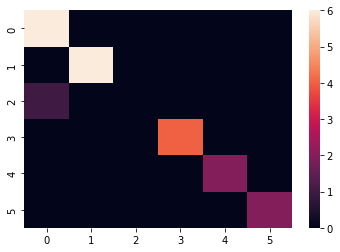

In [26]:
sns.heatmap(cm)